In [1]:
import pandas as pd
import seaborn as sns

In [2]:
game_data = pd.read_csv("game_stats.csv")
games = pd.read_csv("games.csv")

In [3]:
combined_data = games.merge(game_data, left_on='id', right_on='id', validate='one_to_one')

In [4]:
def point_diff(row):
    return row["home_points"] - row["away_points"]

combined_data["point_differential"] = combined_data.apply(point_diff, axis=1)

Text(0.5, 1.0, 'Home Team Passing TDs vs Point Differential')

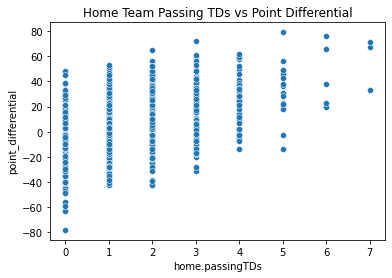

In [5]:
sns.scatterplot(
    data=combined_data, x="home.passingTDs", y="point_differential"
).set_title("Home Team Passing TDs vs Point Differential")

There is a positive correlation between Home Team Passing TDs and Point Differential, which means that as the home team scores more touchdowns, the point differential generally goes up and becomes more positive, which means that the home team won.

Text(0.5, 1.0, 'Away Team Passing TDs vs Point Differential')

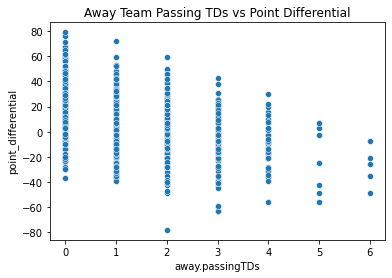

In [6]:
sns.scatterplot(
    data=combined_data, x="away.passingTDs", y="point_differential"
).set_title("Away Team Passing TDs vs Point Differential")

There is a negative correlation between Away Team Passing TDs and Point Differential, which means that as the away team scores more touchdowns, the point differential generally goes down and becomes negative, which means that the away team won.

Text(0.5, 1.0, 'Total Passing TD Differential vs Point Differential')

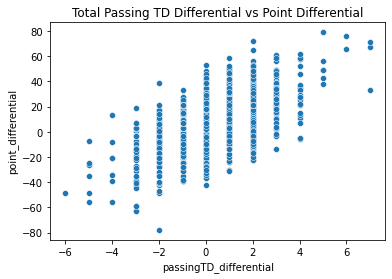

In [8]:
def total_passingTD_diff(row):
    return row["home.passingTDs"] - row["away.passingTDs"]

combined_data["passingTD_differential"] = combined_data.apply(total_passingTD_diff, axis=1)
sns.scatterplot(
    data=combined_data, x="passingTD_differential", y="point_differential"
).set_title("Total Passing TD Differential vs Point Differential")

There is a positive correlation between passing TD differential and point differential, which means that as the home team scores more passing touchdowns than the away team (passing TD differential grows), the point differential also grows, meaning the home team scored more points than the away team and won the game. Vice versa, as passing TD differential decreases, meaning the away team scores more touchdowns than the home team, the point differential decreases, meaning the away team won.